# Algoritmo del Bandido Multibrazo (Multi-Armed Bandit)\n

Este notebook explica paso a paso el funcionamiento del **algoritmo del bandido multibrazo** usando la estrategia **epsilon-greedy**. Incluye un ejemplo detallado y un caso de aplicación real.

### Contexto del Problema:
El **bandido multibrazo** simula el proceso de seleccionar entre varias opciones (por ejemplo, anuncios en una campaña de marketing o máquinas tragaperras) con el objetivo de **maximizar la recompensa obtenida** mientras se aprende cuál es la mejor opción.

En este ejemplo, implementaremos el algoritmo y lo aplicaremos a un caso real.

---

### Objetivo:
- Entender cómo funciona el algoritmo.
- Aplicarlo para seleccionar el mejor bandido en un entorno simulado.
- Analizar los resultados.

## Detalles del Algoritmo

El algoritmo utiliza la estrategia **epsilon-greedy**, que equilibra la exploración y la explotación:
- **Exploración**: Probar opciones nuevas para recopilar información adicional.
- **Explotación**: Elegir la mejor opción conocida según la información actual.

### Pasos del Algoritmo:
1. Inicializar las probabilidades de recompensa de cada bandido.
2. Iterar un número de juegos (partidas).
3. Para cada partida:
    - Decidir si explorar o explotar.
    - Seleccionar un bandido basado en la decisión anterior.
    - Obtener la recompensa.
    - Actualizar las estimaciones (\( Q(a) \)) para el bandido seleccionado.
4. Analizar los resultados finales.

# Caso Práctico: Optimización de Campañas de Marketing Online

En este caso práctico, abordaremos la optimización de una campaña de marketing online utilizando el algoritmo del bandido multibrazo. El objetivo es maximizar la efectividad de los anuncios mostrados en una página web.

## Contexto del Problema

Supongamos que estamos lanzando una campaña de marketing online para promocionar un producto específico. Para ello, se mostrarán banners con imágenes del producto en una página web. El equipo de diseño ha creado cinco imágenes distintas del producto, y nuestro objetivo es determinar cuál de estas imágenes capta más la atención de los usuarios, es decir, cuál genera más clics.

## Desafío

Dado que no sabemos a priori cuál de las imágenes será la más efectiva, necesitamos aprender en base a los clics que los usuarios realizan sobre los banners. Utilizaremos el algoritmo del bandido multibrazo para identificar la imagen que maximiza las visitas a la página del producto.

## Fórmula de Evaluación

Para evaluar la efectividad de cada imagen, utilizamos la siguiente fórmula:

$$Q(imagen_i) = \frac{Nº \text{ de Clicks}}{Nº \text{ de Impresiones}}$$

El objetivo es encontrar la imagen que tenga el mayor valor de \( Q \):

$$Q(imagen^{*}) = \max Q(imagen_i)$$

## Implementación del Algoritmo

Utilizaremos el método `multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False)` para simular el proceso de selección de la mejor imagen. Este método implementa la estrategia epsilon-greedy, que equilibra la exploración de nuevas opciones y la explotación de las opciones conocidas.

### Parámetros del Método

- `num_games`: Número de iteraciones o juegos que se realizarán.
- `epsilon`: Ratio de exploración, que determina la probabilidad de explorar nuevas opciones.
- `verbose`: Si es `True`, se imprimen detalles de cada iteración.

### Ejecución del Método

Llamaremos al método `multi_armed_bandit` con un ratio de exploración adecuado (`epsilon`) para encontrar la imagen que obtiene el mayor número de clics. A continuación, se muestra un ejemplo de cómo llamar al método:



In [8]:
import numpy as np

   
    
def multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False):
    
    bandits = [0.1, 0.05, 0.03, 0.7, 0.02]
    total_reward = 0
    acum_reward_bandit = np.zeros(len(bandits))  # numerador
    num_selected_bandit = np.zeros(len(bandits)) # denominador
    q_bandits = np.zeros(len(bandits))            # Q(a)
    
    if verbose:
        print("Initial Bandits Distribution\n  {}".format(bandits))
    
    for game in range(0,num_games):
        
        old_q_bandits = q_bandits.copy()
        
        if np.random.random() < epsilon:
            bandit = np.random.randint(len(bandits)) # Exploro
        else:
            bandit = np.random.choice(np.flatnonzero(q_bandits == q_bandits.max())) # Exploto 
            
        # Obtengo el reward
        reward = 1 if (np.random.random() < bandits[bandit]) else 0
        
        # Actualizo reward total
        total_reward += reward
        
        # Actualizo valor (Q) de la imagen
        acum_reward_bandit[bandit] += reward
        num_selected_bandit[bandit] += 1
        q_bandits[bandit] = acum_reward_bandit[bandit] / num_selected_bandit[bandit]
        
        if verbose:
            print("\nGAME {game}\n  Old Q_Bandits = {old_q_bandits}\n  Selected Bandit = {bandit} \
                  \n  Reward = {reward}\n  Q_Bandits = {q_bandits}"
                  .format(game=game+1, old_q_bandits=old_q_bandits, bandit=bandit, 
                          reward=reward, q_bandits=q_bandits))
    
    return bandits, total_reward, q_bandits, num_selected_bandit


### Ratio de Exploración EPSILON:


* Modificando la constante "EPSILON" que es el ratio de exploración se pide:

1. Cual es el valor de EPSILON que máximiza la imagen con mayor número de clicks
    + RESPUESTA: El valor debería de ser entorno a 0.1 [0.05-0.2] serian valores válidos
    
2. Cual es la imagen que más clicks obtiene y cuantos:
    + RESPUESTA: Es la imagen D (en la gráfica la imagen 3) con un número de Clicks que debe rondar entre los 600 y 700.
    
3. Poniendo un ratio de exploración del 100% que resultado obtenemos:
    + RESPUESTA: Con este ratio de exploración obtenemos muy malos resultados ya que estamos seleccionando una imagen de manera aleatoria.

Initial Bandits Distribution
  [0.1, 0.05, 0.03, 0.7, 0.02]
Bandits Distribution games
  [101.  18.  18. 819.  44.]
Q(a) Bandits
  [0.0891 0.0556 0.     0.7155 0.0227]
CLICKS: 597


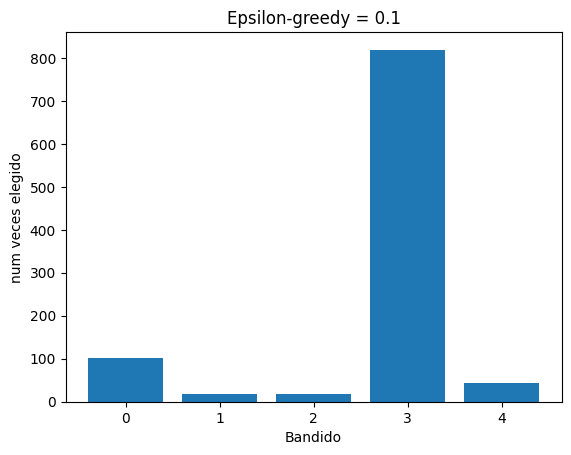

In [16]:
import matplotlib.pyplot as plt
EPSILON = 0.1

%matplotlib inline
np.set_printoptions(precision=4)

bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=EPSILON, 
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("CLICKS: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.title('Epsilon-greedy = {}'.format(EPSILON))
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()

Valores Reales de los Bandidos: [0.1, 0.05, 0.03, 0.7, 0.02]
Estimaciones Q(a) de los Bandidos: [0.0891 0.0556 0.     0.7155 0.0227]
Número de veces que cada bandido fue seleccionado: [101.  18.  18. 819.  44.]
Recompensa Total: 597


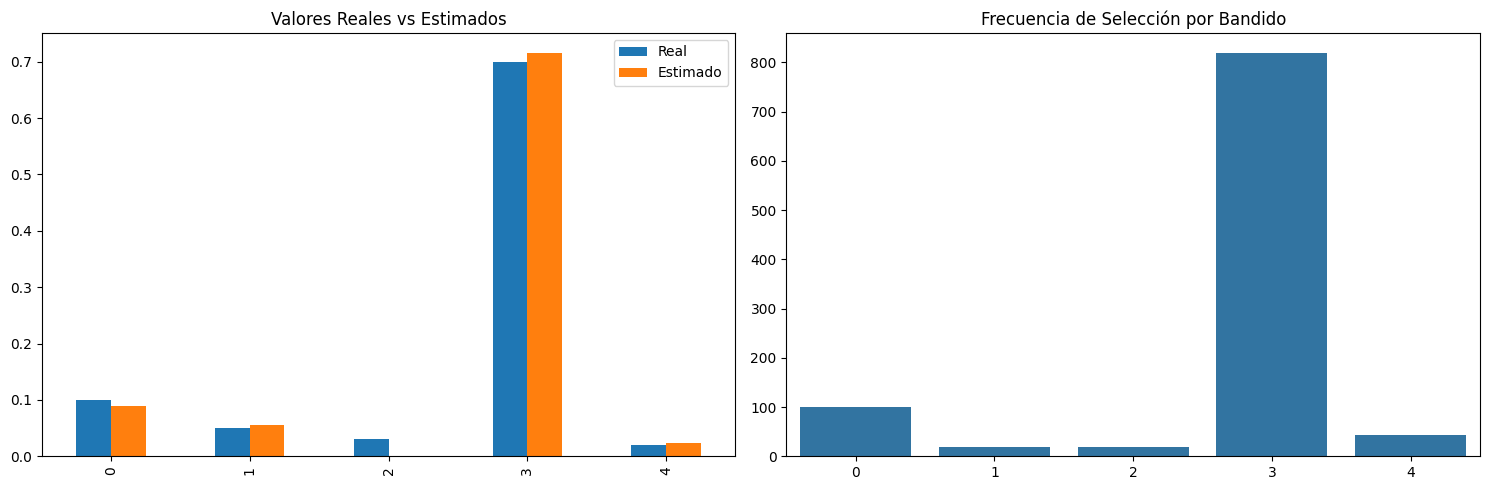

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Análisis de Resultados

# Mostramos los valores reales y estimados de cada bandido
print("Valores Reales de los Bandidos: {}".format(bandits))
print("Estimaciones Q(a) de los Bandidos: {}".format(q_bandits))

# Mostramos el número de veces que cada bandido fue seleccionado
print("Número de veces que cada bandido fue seleccionado: {}".format(num_selected_bandit))

# Mostramos la recompensa total obtenida
print("Recompensa Total: {}".format(total_reward))

# Gráfica de los valores reales vs estimados

def plot_results(bandits, q_estimates, selections):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Gráfico de estimaciones vs valores reales
    df = pd.DataFrame({
        'Real': bandits,
        'Estimado': q_estimates
    })
    df.plot(kind='bar', ax=ax1)
    ax1.set_title('Valores Reales vs Estimados')
    
    # Gráfico de selecciones
    sns.barplot(x=range(len(selections)), y=selections, ax=ax2)
    ax2.set_title('Frecuencia de Selección por Bandido')
    
    plt.tight_layout()
    return fig

# Llamamos a la función para graficar los resultados
plot_results(bandits, q_bandits, num_selected_bandit)
plt.show()